In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

In [2]:
!pip install opendatasets plotly scikit-learn --upgrade --quiet

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
iris_df=sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


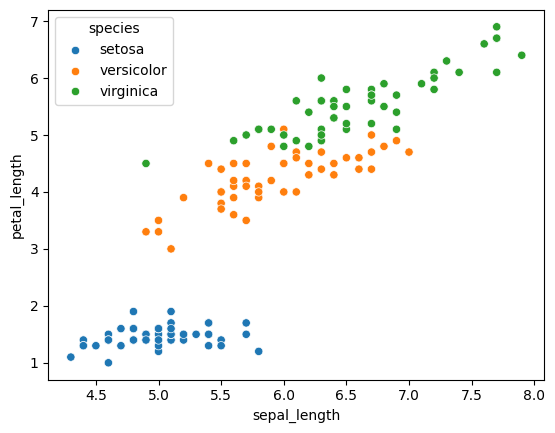

In [5]:
sns.scatterplot(data=iris_df,x='sepal_length',y='petal_length',hue='species');

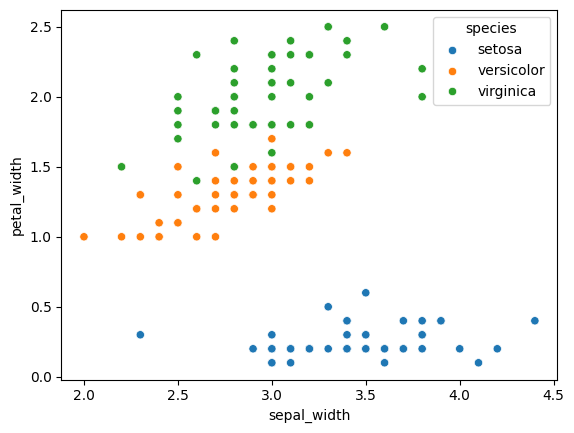

In [6]:
sns.scatterplot(data=iris_df,x='sepal_width',y='petal_width',hue='species');

In [8]:
numeric_cols=['sepal_length','sepal_width','petal_length','petal_width']
x=iris_df[numeric_cols]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#K Means clustering
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=7).fit(x)
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [11]:
iris_df[numeric_cols].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
preds=model.predict(x)
print(model.inertia_)
preds

78.85566582597727


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

Text(0.5, 1.0, 'KMeans on iris_dataset')

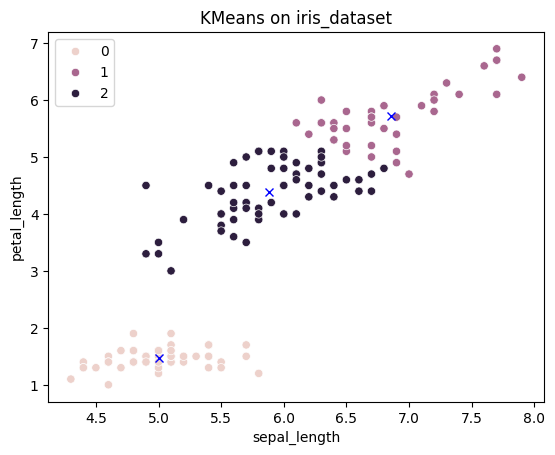

In [16]:
sns.scatterplot(data=x,x='sepal_length',y='petal_length',hue=preds);
centers_x,centers_y=model.cluster_centers_[:,0],model.cluster_centers_[:,2]
plt.plot(centers_x,centers_y,'xb')
plt.title("KMeans on iris_dataset")

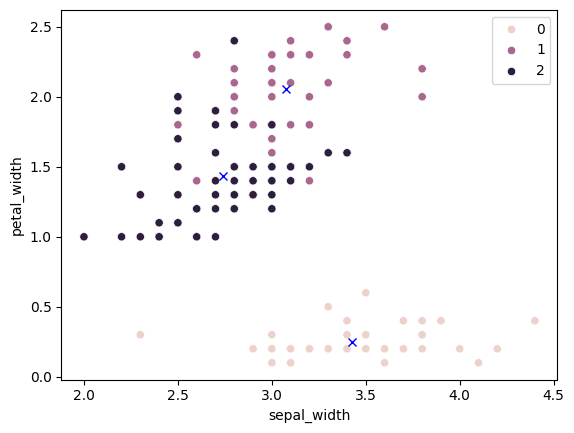

In [17]:
sns.scatterplot(data=x,x='sepal_width',y='petal_width',hue=preds);
center_x,center_y=model.cluster_centers_[:,1],model.cluster_centers_[:,3]
plt.plot(center_x,center_y,'xb')

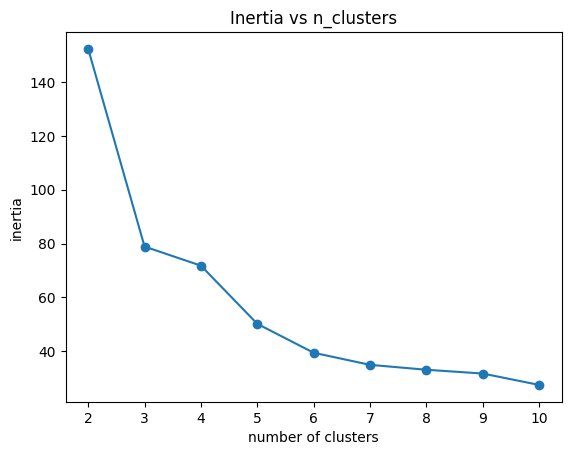

In [19]:
options=range(2,11)
inertias=[]
for n in options:
  model=KMeans(n_clusters=n,random_state=7).fit(x)
  inertias.append(model.inertia_)
plt.title("Inertia vs n_clusters")
plt.plot(options,inertias,'-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia');

In [20]:
#DBSCAN - density based spatial clustering of applications with noise
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=1.1,min_samples=4).fit(x)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'DBSCAN on iris_dataset')

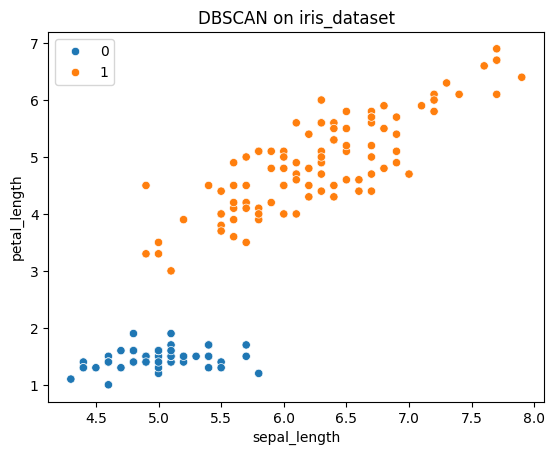

In [21]:
sns.scatterplot(data=x,x='sepal_length',y='petal_length',hue=model.labels_);
plt.title("DBSCAN on iris_dataset")

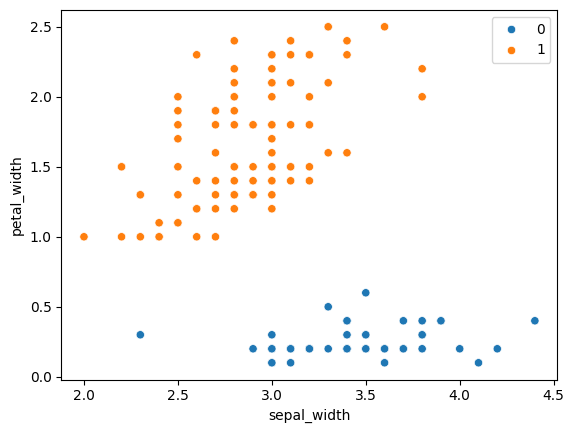

In [22]:
sns.scatterplot(data=x,x='sepal_width',y='petal_width',hue=model.labels_);

In [30]:
#The Concept of Hierarchical clustering:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(linkage='ward').fit(x)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

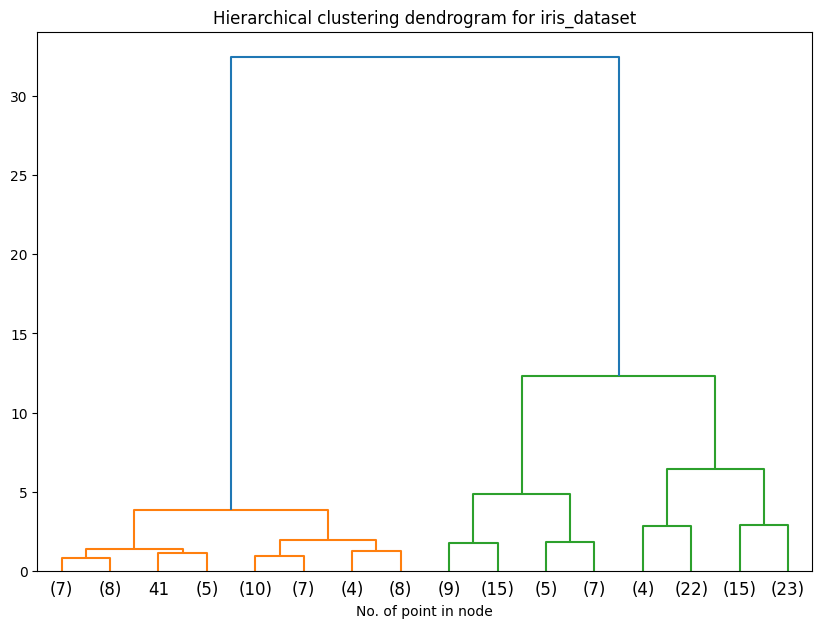

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_mat=linkage(x,method='ward')
plt.figure(figsize=(10,7))
dendrogram(linkage_mat,truncate_mode='level',p=3)
plt.title('Hierarchical clustering dendrogram for iris_dataset')
plt.xlabel('No. of point in node')
plt.show()

Dimensionality Reduction and Manifold Learning(for nonlinear dimensionality reduction)


In [52]:
#PCA - principal component analysis
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(x)
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [53]:
tf=pca.transform(x)
tf

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

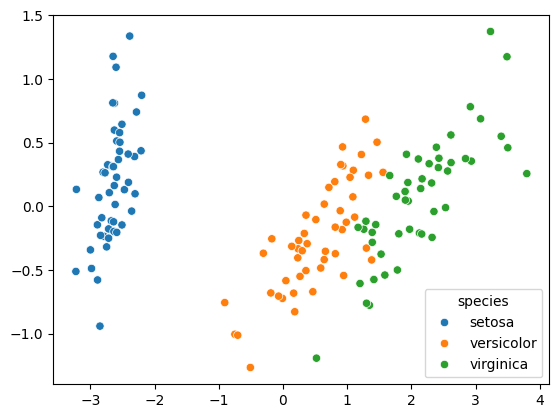

In [54]:
sns.scatterplot(x=tf[:,0],y=tf[:,1],hue=iris_df.species);           #all 4 dimensions of data in the iris dataset is decomposed to 2 dimensions.

In [64]:
#t-SNE  -  distributed stochastic neighbour embedding - a manifold learning approach
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
tf=tsne.fit_transform(x)
tf

array([[-2.35809307e+01, -5.22060156e-01],
       [-2.62917042e+01, -1.09369588e+00],
       [-2.61933346e+01,  5.30571826e-02],
       [-2.66382561e+01, -3.21696430e-01],
       [-2.35450134e+01, -9.41376507e-01],
       [-2.16082954e+01, -8.10961246e-01],
       [-2.59608002e+01,  4.58464950e-01],
       [-2.43470783e+01, -4.96076971e-01],
       [-2.73912773e+01, -3.01681638e-01],
       [-2.57687702e+01, -9.45293069e-01],
       [-2.20654278e+01, -1.82509467e-01],
       [-2.49495239e+01, -8.73362005e-01],
       [-2.65746098e+01, -8.87391508e-01],
       [-2.75171375e+01,  3.22735608e-01],
       [-2.07749710e+01, -9.77787822e-02],
       [-2.05931244e+01, -6.52583599e-01],
       [-2.14729099e+01, -4.12662476e-01],
       [-2.35401649e+01, -3.40562731e-01],
       [-2.12914257e+01,  9.89724994e-02],
       [-2.25217514e+01, -9.96302843e-01],
       [-2.26839333e+01,  5.70334435e-01],
       [-2.28101254e+01, -8.04687738e-01],
       [-2.59318562e+01,  1.24782252e+00],
       [-2.

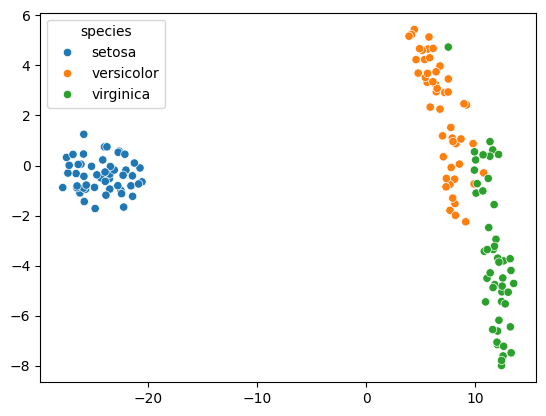

In [65]:
sns.scatterplot(x=tf[:,0],y=tf[:,1],hue=iris_df.species);